In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron

In [2]:
with open('data/dataAll.txt', 'rb') as file:
    auxFile = file.read()

dataAll = np.frombuffer(auxFile)
dataAll.resize((int(len(dataAll)/3)), 3)

X = dataAll[...,0:2] #[[x01,x02], ...]
y = dataAll[...,2] #[[yd0], [yd1], ...]

#adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)


n = Neuron(.1, -.5, .5)
print("Vetor de pesos inicial: ",n.weightArray)
n.fit(X, y)
print("Alterações no vetor de Pesos: ", n.fitCountWeight)
print("Numero de Epocas", n.epoch)
print("Vetor de Pesos no final", np.around(n.weightArray,4))
x = [i for i in range(-len(dataAll),len(dataAll))]
line = [(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x]# calcula a reta y = mx + b

Vetor de pesos inicial:  [-0.16953874 -0.37469689  0.21557494]
Alterações no vetor de Pesos:  217
Numero de Epocas 18
Vetor de Pesos no final [ 632.6723 -631.0243    2.5156]


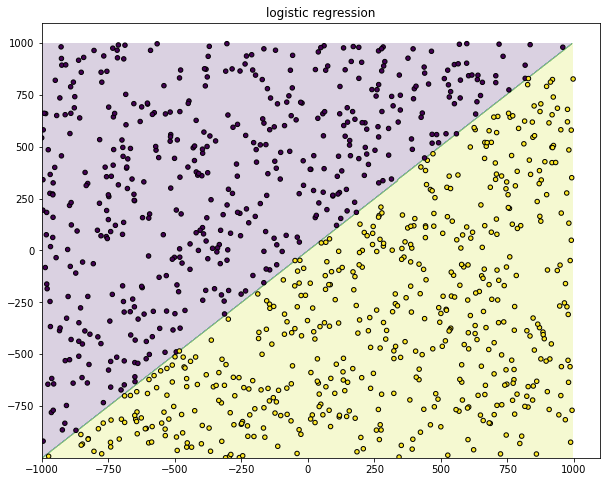

In [3]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 5),
                     np.arange(y_min, y_max, 5))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['logistic regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=y,
                  s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)

plt.show()
